# **Proyek Analisis Data**
- **Nama :** Fahmi Mohamad Ramdan
- **Email :** fahmimramdan6@gmail.com
- **ID Dicoding :** m011d4ky3350

## **Menentukan Pertanyaan Bisnis**

- Pertanyaan 1 : Bagaimana jumlah peminjam sepeda setiap bulannya?
- Pertanyaan 2 : Bagaimana jumlah peminjam sepeda berdasarkan *weekday*?
- Pertanyaan 3 : Bagaimana pengaruh kondisi cuaca terhadap peminjaman sepeda?

## **Import Semua Packages/Library yang Digunakan**

Pada bagian ini kebutuhan yang akan digunakan untuk membuat proyek, yaitu memanggil terlebih dahulu library yang dibutuhkan. barikut adalah library yang akan digunakan untuk proyek akhir ini.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

### **Gathering Data**
Pada tahap ini dilakukan pengumpulan data yang dibutuhkan untuk menjawab pertanyaan dari pertanyaan bisnis yang didapatkan.

Data yang digunakan adalah dataset tentang Bike Sharing. Terdapat dua jenis data CSV, yaitu **day**.**csv** dan **hour.csv** . Data **day**.**csv** ini akan menggambarkan data dari aktivitas berdasarkan harian. sedangakn **hour.csv** ini akan menggambarkan data berdasarkan aktivitas yang lebih detail dalam setiap jam tertentu dalam satu hari. Kali ini data yang dugunakan yaitu adalah **day.csv**.

Pertama adalah memuat data nya terlebih dahulu. Dengan menggunakan kode di bawah kita dapat memuat data dari tabel tersebut menjadi sebuah DataFrame.
Kode di bawah adalah untuk memuat data **day.csv**. Kode tersbut menggunakan fungsi pada library pandas untuk membaca file CSV dari sumber atau URL yang diberikan. Fungsi tersebut juga akan memngkonversi datanya ke dalam bentuk DataFrame. Kemudian fungsi dari **.head()** akan menampilkan beberapa baris pertama data.

In [29]:
csv_url = "https://raw.githubusercontent.com/fahmimramdan6/Proyek-Akhir-Analisis-Data-Dengan-Python/main/day.csv"
bike_day_df = pd.read_csv(csv_url)
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Assessing Data**

Pada bagian Assesing Data ini, dilakukan untuk menilai kualitas dari data yang akan digunakan. Sehingga nantinya data yang digunakan aman dan tidak ada masalah ketika data divisualisasikan.

**Menilai Data day.csv**

Pada bagian ini data pertama yang akan dianalisis adalah day.csv.

Data tersebut akan diperiksa menggunakan metode **info()**. Kodenya adalah sebagai berikut :

In [30]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil yang ditampilkan tersebut bahwa jumlah data sudah sesuai untuk setiap kolomnya dengan ditandai dengan nilai yang sama. Namun pada keterangan data type untuk **dteday** yang seharusnya data type untuk **dteday** adalah dalam bentuk **datetime** bukan **object**.

Kemudian selajutnya adalah dengan memeriksa duplikasi data. Pada proses ini digunakna metode **.duplicate()** untuk memeriksa duplikasi data. Kodennya adalah sebagai berikut:  

In [31]:
print("Jumlah duplikasi: ", bike_day_df.duplicated().sum())

Jumlah duplikasi:  0


Hasilnya pada data **day.csv** tidak terdapat duplikasi.

Kemudain selanjutnya dalam menilai data adalah dengan melihat parameter statistik. Pada tahap ini metode yang digunakan adalah **.describe()**. Metode ini akan menghasilkan ringkasan parameter statistik seperti *mean*, *median*, *standar deviasi*, dan lain-lain. Kodenya adalah sebagai berikut.

In [32]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada pengecekan data menggunaan parameter statistik ini terlihat bahwa tidak ada keanehan.

Setelah dilakuakan pemeriksaan berdasarkan parameter statistik, tidak terdapat keanehan pada data yang digunakan.

Dari Proses **Assesing Data** ini ditemukan bahwa hanya ada satu kesalahan, yaitu data type untuk **dteday** tidak sesuai karena yang terlihat adalah dalam bentuk **object** bukan dalam bentuk **datetime**. Data type berupa **object** seharusnya digunakan untuk tipe data string.

### **Cleaning Data**
Pada proses Cleaning Data ini dilakukan pembersihan data terhadap kesalahan yang telah teridentifikasi pada saat **assesing data**. Terdapat kesalahan berupa data type untuk **dteday**.

Berikut adalah Cleaning Data yang akan dilakukan :

**Cleaning Data day.csv**

Pada tahap ini pembersihan data yang dilakuakan untuk mengubah tipe data adalah dengan menggunakan metode atau fungsi **to_datetime()**. Library yang terlibat adalah **pandas**.

Pertama dilakukan pembuatan list **datetime_columns** yang diisi dengan nama-nama kolom yang akan diubah menjadi tipe data yang sesuai yaitu **datetime**. Kemudian dilakukan iterasi menggunakan fungsi **for** yang akan mengiterasi setiap kolom yang ada di list **datetime_columns**. Kemudian kolom tersebut diubah dengan fungsi **pd.to_datetime()** Kodenya adalah sebagai berikut :

In [33]:
datetime_columns = ["dteday"]
for column in datetime_columns :
  bike_day_df[column] = pd.to_datetime(bike_day_df[column])

Pada bagian ini tidak akan mengeluarkan output secara visual. Namun akan langsung memperbaiki tipe data yang ingin diperbaiki.

Untuk mengeceknya, digunakan fungsi atau metode yang sebelumnya yaitu **.info()** dan hasilnya adalah sebagai berikut :

In [34]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Terlihat bahwa dari info yang diberikan, tipe data untuk **dteday** berubah menjadi **datetime64[ns]**. Sehingga tipe datanya sudah sesuai.

Setelah pembersihan data hasilnya akan terlihat dan tipe datanya sudah sesuai dengan yang seharusnya.

## **Exploratory Data Analysis (EDA)**

Pada Bagian Exploratory Data Analysis (EDA), dilakukan terlebih dahulu dengan menentukan pertanyaan bisnis. Pada kasus ini berdasarkan data yang telah didapatkan, kita dapat menghasilkan beberapa pertanyaan sebagai berikut :
1. Bagaimana jumlah peminjam sepeda setiap bulannya?
2. Bagaimana jumlah peminjam sepeda berdasarkan *weekday*?
3. Bagaimana pengaruh kondisi cuaca terhadap peminjaman sepeda?

**Eksplorasi Data bike_day_df**

Untuk melakukan EDA ini, dilakukan kembali rangkuman parameter statistik dengan menggunakan funsgi **.describe()**.

In [35]:
bike_day_df.describe(include="all")

<ipython-input-35-bc20bf189dca>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Pada hasil ini bisa kita lihat jumlah data yang didapatkan ada sebanyak 731 data dari mulai 2011-01-01 sampai 2012-12-12. Data tersebut juga menamplikan banyak detail terkait distribusi peminjaman sepeda berdasarkan musim, tahun, bulan, dan lain-lain. Selain itu juga kita bisa melihat pengaruh dari temperatur, kecepatan angin dan sebagainya terhadap peminjaman sepeda.

Kemudian kita akan melihat bagaimana distribusi peminjaman sepeda berdasarkan musimnya. Fungsi yang digunakan adalah method **groupby()** yang diikuti **agg()** untuk melakukan operasi agregasi pada data yang dikelompokkan sesuai keinginan kita sendiri.

1. berdasarkan musimnya (*Season*)

In [36]:
bike_day_df.groupby(by="season").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,season,cnt,casual,registered
0,1,471348,60622,410726
1,2,918589,203522,715067
2,3,1061129,226091,835038
3,4,841613,129782,711831


2. Berdasarkan Tahun (*yr*)

In [37]:
bike_day_df.groupby(by="yr").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,yr,cnt,casual,registered
0,0,1243103,247252,995851
1,1,2049576,372765,1676811


3. Berdasarkan Bulan (*mnth*)

In [38]:
bike_day_df.groupby(by="mnth").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,mnth,cnt,casual,registered
0,1,134933,12042,122891
1,2,151352,14963,136389
2,3,228920,44444,184476
3,4,269094,60802,208292
4,5,331686,75285,256401
5,6,346342,73906,272436
6,7,344948,78157,266791
7,8,351194,72039,279155
8,9,345991,70323,275668
9,10,322352,59760,262592


4. Berdasarkan hari libur (*holiday*)

In [39]:
bike_day_df.groupby(by="holiday").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,holiday,cnt,casual,registered
0,0,3214244,597658,2616586
1,1,78435,22359,56076


5. Berdasarkan *weekday*

In [40]:
bike_day_df.groupby(by="weekday").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,weekday,cnt,casual,registered
0,0,444027,140521,303506
1,1,455503,70784,384719
2,2,469109,57843,411266
3,3,473048,57319,415729
4,4,485395,61460,423935
5,5,487790,78238,409552
6,6,477807,153852,323955


6. Berdasarkan Hari Kerja (*Workingday*)




In [41]:
bike_day_df.groupby(by="workingday").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,workingday,cnt,casual,registered
0,0,1000269,316732,683537
1,1,2292410,303285,1989125


7. Berdasarkan Kondisi Cuaca (*Weathershit*)

In [42]:
bike_day_df.groupby(by="weathersit").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,weathersit,cnt,casual,registered
0,1,2257952,446346,1811606
1,2,996858,169776,827082
2,3,37869,3895,33974


8. Berdasarkan Temperatur dalam Celsius (*temp*)

In [43]:
bike_day_df.groupby(by="temp").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,temp,cnt,casual,registered
0,0.059130,981,93,888
1,0.096522,986,150,836
2,0.097391,1416,86,1330
3,0.107500,2368,95,2273
4,0.127500,1529,73,1456
...,...,...,...,...
494,0.834167,5463,829,4634
495,0.838333,3846,670,3176
496,0.848333,3387,562,2825
497,0.849167,3285,987,2298


9. Berdasarkan Suhu terasa (*atemp*)

In [44]:
bike_day_df.groupby(by="atemp").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,atemp,cnt,casual,registered
0,0.079070,981,93,888
1,0.098839,986,150,836
2,0.101658,1529,73,1456
3,0.116175,822,54,768
4,0.117930,1416,86,1330
...,...,...,...,...
685,0.794829,3606,1050,2556
686,0.804287,3285,987,2298
687,0.804913,4840,1448,3392
688,0.826371,3784,632,3152


10. Berdasarkan Kelembapan (*Humidity*)

In [45]:
bike_day_df.groupby(by="hum").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,hum,cnt,casual,registered
0,0.000000,623,46,577
1,0.187917,1635,532,1103
2,0.254167,6857,3252,3605
3,0.275833,5169,2230,2939
4,0.290000,5102,531,4571
...,...,...,...,...
590,0.948261,605,114,491
591,0.949583,2594,126,2468
592,0.962500,1607,69,1538
593,0.970417,705,50,655


11. Berdasarkan Kecepatan Angin (*Windspeed*)

In [46]:
bike_day_df.groupby(by="windspeed").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

,windspeed,cnt,casual,registered
0,0.022392,4985,949,4036
1,0.042304,5117,1514,3603
2,0.045404,5409,2235,3174
3,0.045408,1712,120,1592
4,0.046650,5087,337,4750
...,...,...,...,...
645,0.417908,1913,208,1705
646,0.421642,2732,317,2415
647,0.422275,4195,471,3724
648,0.441563,5382,486,4896


Berdasarkan pengelompokan data yang telah dilakukan, dapat kita lihat berbagai macam info yang didapatkan. Sesuai dengan pertanyaan bisnis, jika dilihat  

## **Visualization & Explanatory Analysis**

**Pertanyaan 1** : Bagaimana jumlah peminjam sepeda setiap bulannya?

Untuk menjasab pertanyaan ini, kita perlu untuk membuat DataFrame terlebih dahulu untuk memuat informasi yang dibutuhkan. Pada pembuatan DataFrame ini informasi yang dibutuhkan adalah **dteday, cnt, casual**, dan **registered**. Untuk menghasilkan DataFrame, digunakan methode **groupby()**. Selanjutnya yaitu mengkonversi Tanggal atau **Dteday** menjadi **Timestamp** untuk nantinya digunakan plotting.
Setelah itu plotting dilakukan dengan terlebih dahulu membuat ukuran objek gambar. Kemudian membuat plotnya itu sendiri dengan menggunakan sumbu x untuk setiap kategori dan jumlah peminjaman sepeda di sumbu y. dilakukan 3 kali untuk **cnt**, **casual**, dan **registered**. Kemudian plot tersebut diberikan keterangan mencakup judul, y label, x label, dan yang lainnya sampai dishow menggunakan methode **plt.show()**.

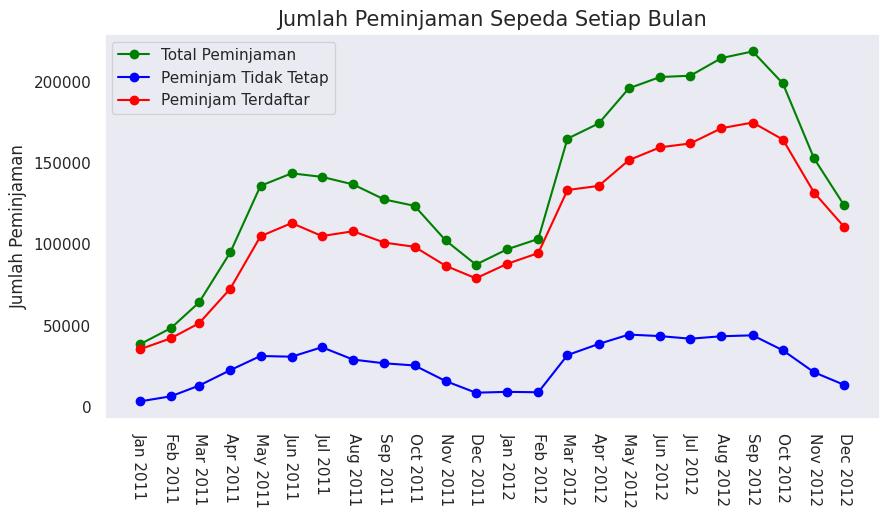

In [47]:
# Membuat DataFrame
monthly_bike_data = bike_day_df.groupby(bike_day_df["dteday"].dt.to_period("M")).agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

# Mengubah dteday ke timestamps
monthly_bike_data["dteday"] = monthly_bike_data["dteday"].dt.to_timestamp()

#Plot Grafik
plt.figure(figsize=(10, 5))

plt.plot(
    monthly_bike_data["dteday"],
    monthly_bike_data["cnt"],
    label = "Total Peminjaman",
    color = "green",
    marker = "o"
)
plt.plot(
    monthly_bike_data["dteday"],
    monthly_bike_data["casual"],
    label = 'Peminjam Tidak Tetap',
    color = "blue",
    marker = "o"
)
plt.plot(
    monthly_bike_data["dteday"],
    monthly_bike_data["registered"],
    label = "Peminjam Terdaftar",
    color = "red",
    marker = "o"
)

# atribut plot
plt.title("Jumlah Peminjaman Sepeda Setiap Bulan", fontsize = 15)
plt.ylabel("Jumlah Peminjaman")
plt.xticks(monthly_bike_data["dteday"], labels = monthly_bike_data["dteday"].dt.strftime("%b %Y"), rotation = -90)
plt.legend()
plt.show()

Pada hasil yang diperoleh, terlihat bahwa pada dua tahun terkahir tersebut di awal tahunnya peminjaman sepeda selalu mengalami kenaikan, dan puncaknya terjadi ketika di pertengahan tahun. Sedangkan di setiap akhir tahun jumlah peminjaman sepeda menurun di kedua tahun tersebut. Peningkatan dari awal tahun menuju pertengahan tahun, biasanya musim berpindah dair musim yang dingin ke musim yang lebih panas. dan puncak musim panas biasanya di pertengahan tahun yang akhirnya puncaknya tersebut benar ada di pertengahan tahun.
Kemudian penurunan terjadi Pada akhir tahun merupakan musim dingin dan penurunan ini dimulai setelah selesainya musim panas di pertengahan tahun. Dengan keadaan itulah plot grafik ini dihasilkan.

**Pertanyaan 2** : Bagaimana jumlah peminjam sepeda berdasarkan *weekday*?

Untuk menjawab pertanyaan ini keta perlu mendapatkan informasi terlebih dahulu untuk melihat data yang akan digunakan. Kemudian harus dibuat DataFrame terlebih dahulu agar bisa memuat informasi yang akan digunakan yaitu cnt, **casual**, dan **registered**.
Kemudian dilakuakn pengkategorian dan menjadikan kolom untuk weekday ini menjadi sesuai dengan urutan hari (minggu sampai sabtu). Kemudian mengkonversi tipe datanya menjadi integer agar dapat digunakan sebagai indeks.
Selanjutnya adalah plotting untuk Bar chartnya dengan menentukan terlebih dahulu ibjek sesuai ukurannya. Kemudian menentukan lebah batang dari barnya diikuti dengan menentukan posisi barnya. bar1, bar2, dan bar3 akan membuat bar untuk setiap data **cnt**, **casual**, dan **registered**.
Kemudian diatur axes dan label dari grafik untuk membarikan keterangannya dan menambahkan nama hari untuk sumbu dengan **set_xticklabels**. Legenda ditampilkan dan akhirnya plot di show dengan metode **show()**.

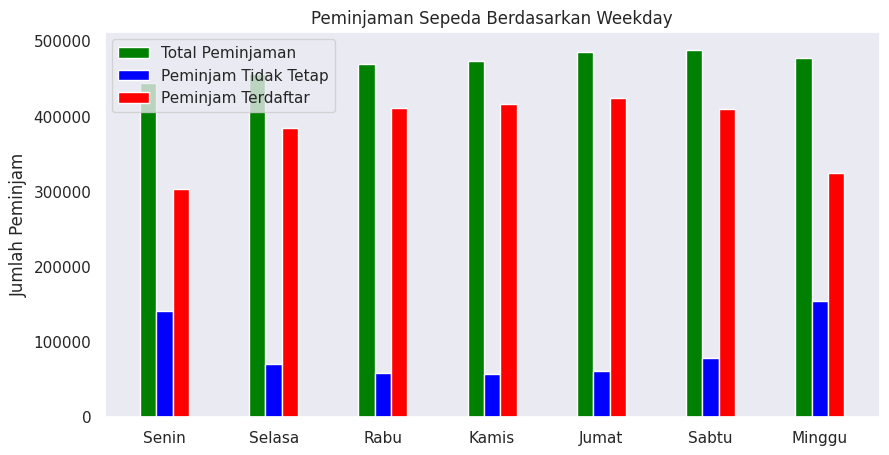

In [48]:
# Membuat DataFrame
weekday_bike = bike_day_df.groupby(by="weekday").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

# Konversi berdasarkan kategori
weekday_bike["weekday"] = pd.Categorical(weekday_bike["weekday"], categories = [0, 1, 2, 3, 4, 5, 6], ordered = True)
weekday_bike["weekday"] = weekday_bike["weekday"].astype(int)

# Bar Plot
fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.15
index = weekday_bike["weekday"]

bar_cnt = ax.bar(
    index - bar_width,
    weekday_bike["cnt"],
    bar_width,
    label = "Total Peminjaman",
    color = "green"
)
bar_casual = ax.bar(
    index,
    weekday_bike["casual"],
    bar_width,
    label = "Peminjam Tidak Tetap",
    color = "blue"
)
bar_registered = ax.bar(
    index + bar_width,
    weekday_bike["registered"],
    bar_width,
    label = "Peminjam Terdaftar",
    color = "red"
)

# atribut plot
ax.set_ylabel("Jumlah Peminjam")
ax.set_title("Peminjaman Sepeda Berdasarkan Weekday")
ax.set_xticks(index)
ax.set_xticklabels(["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"])
plt.legend()
plt.show()

Hasil plot yang didapatkan menunjukkan bagaimana jumlah peminjaman sepeda secara weekday. Plot memuat data untuk *cnt* (jumlah peminjam dari casual dan registered), *casual* (peminjam tidak tetap atau tidak terdaftar), dan *registered* (peminjam terdaftar). Pada hari senin sampai jumat untuk registered jumlahnya banyak karena merupakan hari untuk bekerja.

**Pertanyaan 3** : Bagaimana pengaruh kondisi cuaca terhadap peminjaman sepeda?

Untuk menjawab pertanyaan ini dilakuan untuk langkah awal sama seperti sebelumnya yaitu memuat data atau informasi yang dibutuhkan **weathersit**, **casual** dan **registered**. kemudian dilakukan pengkondisian cuaca untuk dijadikan keterangan juga di sumbu x nantinya.
Kemudian dilakukan pengaturan barnya dan selanjtnya dilakukan plotting. kemudian plotting tersebut diberi keterangan mulai dari x label, y label, legenda, judul dan lain-lain.

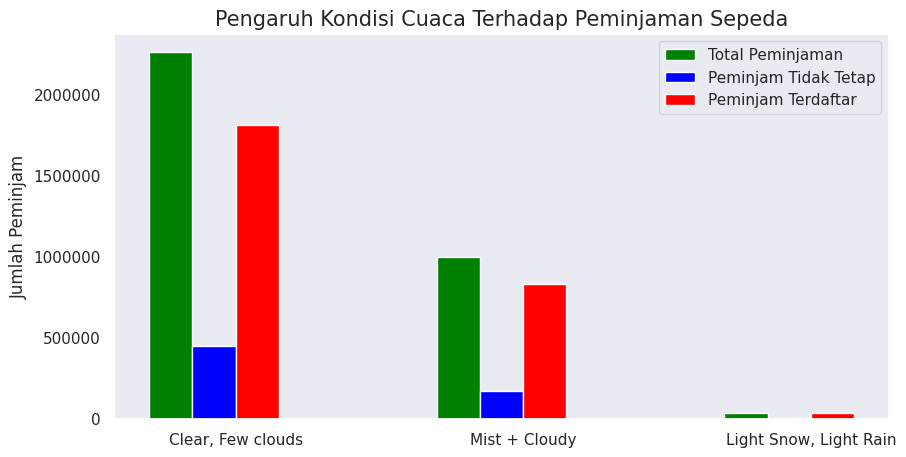

In [49]:
# Membuat DataFrame
by_weathersit_bike = bike_day_df.groupby(by="weathersit").agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).reset_index()

# Konversi Numerik ke Dictionary
kondisi_cuaca = {
    1: "Clear, Few clouds",
    2: "Mist + Cloudy",
    3: "Light Snow, Light Rain",
    4: "Heavy Rain, Thunderstorm, Mist"
}
by_weathersit_bike["cuaca"] = by_weathersit_bike["weathersit"].map(kondisi_cuaca)

# plot grafik
plt.figure(figsize=(10, 5))

bar_width = 0.15
posisi_bar_cnt = range(len(by_weathersit_bike))
posisi_bar_casual = [pos + bar_width for pos in posisi_bar_cnt]
posisi_bar_registered = [pos + bar_width for pos in posisi_bar_casual]

plt.bar(
    posisi_bar_cnt,
    by_weathersit_bike["cnt"],
    color="green",
    width = bar_width,
    label="Total Peminjaman"
)
plt.bar(
    posisi_bar_casual,
    by_weathersit_bike["casual"],
    color="blue",
    width = bar_width,
    label="Peminjam Tidak Tetap"
)
plt.bar(
    posisi_bar_registered,
    by_weathersit_bike["registered"],
    color="red",
    width = bar_width,
    label="Peminjam Terdaftar"
)

# atribut plot
plt.title("Pengaruh Kondisi Cuaca Terhadap Peminjaman Sepeda", fontsize=15)
plt.ylabel("Jumlah Peminjam", fontsize=12)
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks([pos + bar_width /2 for pos in posisi_bar_casual], by_weathersit_bike["cuaca"])
plt.legend()
plt.show()

Pada hasil yang didapatkan, berdasarkan kondisi cuaca terdapat perbedaan yang signifikan antara ketiga data yang dihasilkan. Jika melihat bar chart tersebut. Pada kondisi cuaca dengan jelas dan sedikit awan (*clear, few clouds*) banyak yang meminjam sepeda karena kondisi yang aman. Namun, ketika kondisi cuaca yang berkabut tipis dan langit yang berawan (*Mist + Cloudy*) peminjam sepeda jumlahnya menurun karena keadaan yang berbahaya. Kemudian ketika keadaan bersalju meskipun ringan dengan hujan yang ringan (*Light Snow, Light Rain*) juga, jumlah peminjam sepeda menurun karena akses jalan tertutp dan susah dilewati dalam kondisi cuaca tersebut.

## **Conclusion**

- Pada awal tahun peminjam sepeda terus meningkat sampai puncaknya di pertengahan tahun dan kemudian mulai menurun sampai titik terendahnya di akhir tahun.
- Jumlah peminjam sepea di hari kerja yairu dari senin sampai jumat banyak karena banyak yang melakukan aktivitas dan bekerja di hari tersebut.
- Kondisi cuaca yang buruk mempengaruhi jumlah peminjam sepeda menurun karena akses jalan susah dilewati dan sulit untuk melakukan aktivitas.

In [50]:
from google.colab import drive

# Menghubungkan dengan Google Drive
drive.mount('/content/gdrive', force_remount=True)
path = 'gdrive/MyDrive/CSV FILE/'
bike_day_df.to_csv(path+"bike_day.csv", index=None)


Mounted at /content/gdrive
